In [189]:
# Goal: Predicting Students' School Performance (Overall Math Grades) based on Weekday Alcohol Consumption

In [ ]:
#Dataset link: https://www.kaggle.com/uciml/student-alcohol-consumption

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split, KFold, cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [9]:
alcohol_consumption = pd.read_csv('student-mat.csv')

In [10]:
alcohol_consumption.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [11]:
alcohol_consumption.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [12]:
#-------------------------Data Cleaning-------------------------

In [13]:
#Checking for missing values
alcohol_consumption.isnull().values.any() #We don't have any missing values

False

In [14]:
#Dropping duplicates and resetting index
alcohol_consumption.drop_duplicates()
alcohol_consumption = alcohol_consumption.reset_index(drop = True)

In [15]:
#-------------------------Data Preparation-------------------------

In [16]:
#Creating "overall_grade" variable, which is the mean of G1, G2, and G3
alcohol_consumption["overall_grade"] = (alcohol_consumption["G1"] + alcohol_consumption["G2"] + alcohol_consumption["G3"])/3
alcohol_consumption.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,overall_grade
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,5.666667
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,5.333333
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,8.333333
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,14.666667
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,8.666667


In [17]:
#Making dummy variables for "Dalc"
alcohol_consumption = pd.get_dummies(alcohol_consumption, columns = ["Dalc"])
alcohol_consumption.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,absences,G1,G2,G3,overall_grade,Dalc_1,Dalc_2,Dalc_3,Dalc_4,Dalc_5
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,6,5,6,6,5.666667,1,0,0,0,0
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,4,5,5,6,5.333333,1,0,0,0,0
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,10,7,8,10,8.333333,0,1,0,0,0
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,15,14,15,14.666667,1,0,0,0,0
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,6,10,10,8.666667,1,0,0,0,0


In [18]:
#Selecting the variables needed
alcohol_consumption = alcohol_consumption[["sex", "age", "overall_grade", "Dalc_2", "Dalc_3", "Dalc_4", "Dalc_5"]]
alcohol_consumption2 = pd.read_csv('student-mat.csv')
alcohol_consumption["Dalc"] = alcohol_consumption2["Dalc"]
alcohol_consumption.head()

,sex,age,overall_grade,Dalc_2,Dalc_3,Dalc_4,Dalc_5,Dalc
0,F,18,5.666667,0,0,0,0,1
1,F,17,5.333333,0,0,0,0,1
2,F,15,8.333333,1,0,0,0,2
3,F,15,14.666667,0,0,0,0,1
4,F,16,8.666667,0,0,0,0,1


In [19]:
#-------------------------Data Exploration-------------------------

Text(0.5, 0, 'Overall Grade')

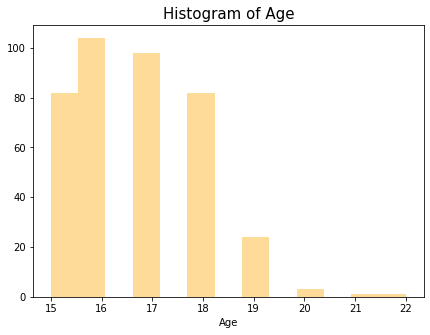

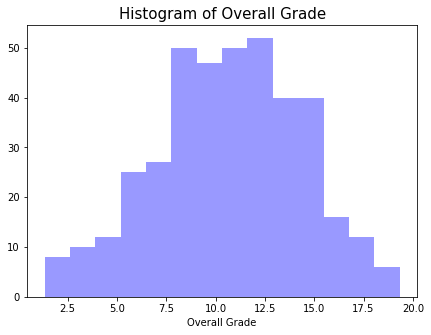

In [20]:
#Histograms of Quantitative Variables
#Age
plt.figure(figsize = (7,5))
histogram1 = sns.distplot(alcohol_consumption["age"], kde=False, color = "orange")
histogram1.set_title("Histogram of Age", fontsize = 15)
histogram1.set_xlabel("Age", fontsize = 10)

#overall_grade
plt.figure(figsize = (7,5))
histogram3 = sns.distplot(alcohol_consumption["overall_grade"], kde=False, color = "blue")
histogram3.set_title("Histogram of Overall Grade", fontsize = 15)
histogram3.set_xlabel("Overall Grade", fontsize = 10)

In [21]:
#Correlations of Quantitative Variables + Weekday alcohol consumption
alcohol_consumption3 = alcohol_consumption[["age", "overall_grade", "Dalc"]]
corr = alcohol_consumption3.corr()
corr.style.background_gradient(cmap = 'coolwarm').set_precision(2)

,age,overall_grade,Dalc
age,1.00,-0.13,0.13
overall_grade,-0.13,1.00,-0.07
Dalc,0.13,-0.07,1.00


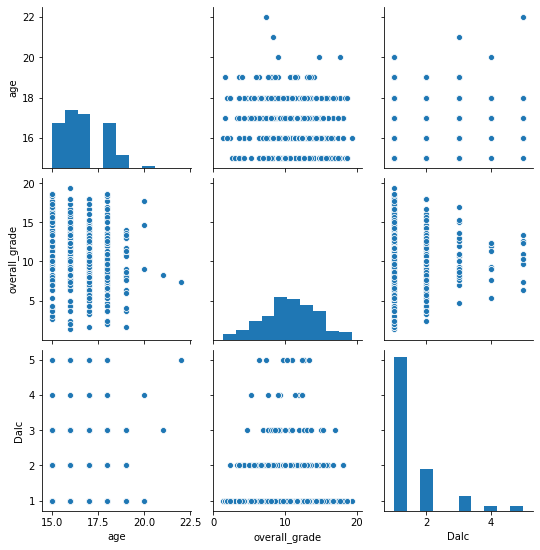

In [22]:
#Relationships amongst Quantitative Variables by Dalc
sns.pairplot(alcohol_consumption, vars = ['age', 'overall_grade', 'Dalc'], diag_kind = 'hist')

Text(3.6750000000000043, 0.5, 'Count')

<Figure size 504x360 with 0 Axes>

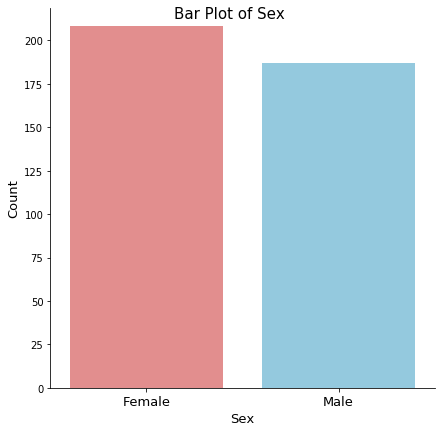

<Figure size 504x360 with 0 Axes>

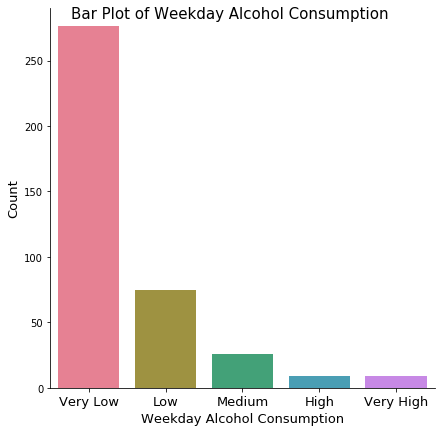

In [23]:
#Barplots of Cateogrical Variables
#Sex
my_pal = {"F" : "lightcoral", "M": "skyblue"}
plt.figure(figsize = (7,5))
bar1 = sns.catplot(data = alcohol_consumption, x = "sex", kind = "count", height = 6, palette = my_pal)
xlabels1 = ["Female", "Male"]
bar1.set_xticklabels(xlabels1, fontsize = 13)
bar1.fig.suptitle("Bar Plot of Sex", fontsize = 15)
plt.xlabel("Sex", fontsize = 13)
plt.ylabel("Count", fontsize = 13)

#Dalc
plt.figure(figsize = (7,5))
bar2 = sns.catplot(data = alcohol_consumption, x = "Dalc", kind = "count", height = 6, palette = "husl")
xlabels2 = ["Very Low", "Low", "Medium", "High", "Very High"]
bar2.set_xticklabels(xlabels2, fontsize = 13)
bar2.fig.suptitle("Bar Plot of Weekday Alcohol Consumption", fontsize = 15)
plt.xlabel("Weekday Alcohol Consumption", fontsize = 13)
plt.ylabel("Count", fontsize = 13)

Text(0, 0.5, 'Sex')

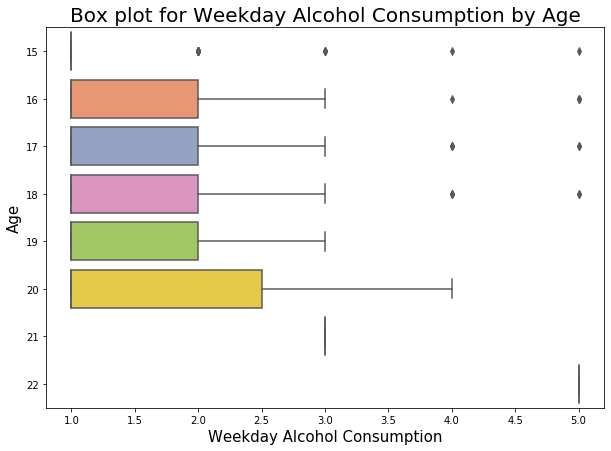

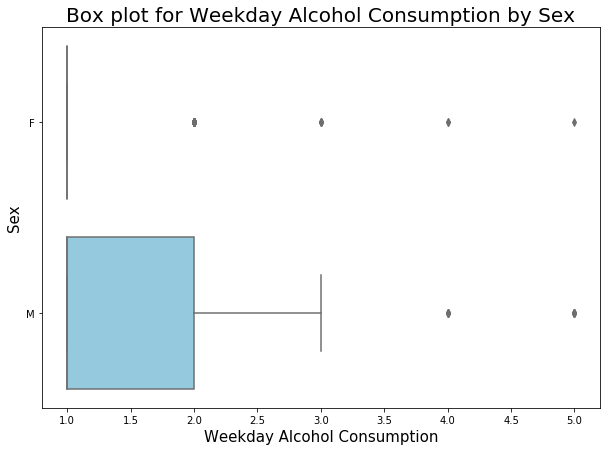

In [24]:
#Boxplots
#Boxplot of "Dalc" by "age"
plt.figure(figsize=(10,7))
boxplot1 = sns.boxplot(data = alcohol_consumption, y = "age", x = "Dalc", orient = "h", palette = "Set2")
boxplot1.set_title("Box plot for Weekday Alcohol Consumption by Age", fontsize = 20)
boxplot1.set_xlabel("Weekday Alcohol Consumption", fontsize = 15)
boxplot1.set_ylabel("Age", fontsize = 15)

#Boxplot of "Dalc" by "sex"
my_pal = {"F" : "lightcoral", "M": "skyblue"}
plt.figure(figsize=(10,7))
boxplot2 = sns.boxplot(data = alcohol_consumption, y = "sex", x = "Dalc", palette = my_pal)
boxplot2.set_title("Box plot for Weekday Alcohol Consumption by Sex", fontsize = 20)
boxplot2.set_xlabel("Weekday Alcohol Consumption", fontsize = 15)
boxplot2.set_ylabel("Sex", fontsize = 15)

In [25]:
#-------------------------Model the Data-------------------------

In [26]:
#Regression model

#To predict "overall_grade"
X1 = alcohol_consumption[['Dalc_2', 'Dalc_3', 'Dalc_4', 'Dalc_5']]
y1 = alcohol_consumption['overall_grade']

#Split train and test sets
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.2, random_state = 100)

#Model initialization
model1 = LinearRegression()
model1.fit(X1_train, y1_train)

#Predict
y1_pred = model1.predict(X1_test)

#Comparing Actual values and predicted values
df1 = pd.DataFrame({'Actual': y1_test, 'Predicted': y1_pred})
print(df1.head(10))

#Model evaluation
mae1 = round(mean_absolute_error(y1_test, y1_pred), 4)
rmse1 = round(np.sqrt(mean_squared_error(y1_test, y1_pred)), 4)
r21 = round(r2_score(y1_test, y1_pred), 4)

#Printing values
print('The coefficients are {}'.format(model1.coef_, 4))
print('The intercept is {}'.format(model1.intercept_))
print('Mean absolute error (MAE) of the model is {}'.format(mae1))
print('Root mean squared error (RMSE) of the model is {}'.format(rmse1))
print('R-squared score is {}'.format(r21))

        Actual  Predicted
188   8.000000  10.859729
365  10.000000   9.748538
190  12.000000  10.859729
353   8.000000  10.608696
166  10.000000   9.748538
75    9.333333   9.748538
231  11.000000  10.859729
341   6.666667   9.748538
380  14.333333  10.859729
267  11.000000   9.748538
The coefficients are [-1.1111905  -0.25103285 -1.24068089 -0.44306184]
The intercept is 10.85972850678733
Mean absolute error (MAE) of the model is 2.5355
Root mean squared error (RMSE) of the model is 3.1679
R-squared score is 0.0013


In [485]:
#Regression model - Perform 6 fold cross validation
scores1 = cross_val_score(model1, X1, y1, cv = 6, scoring = 'neg_root_mean_squared_error')
print('Cross-validated scores:', scores1)

rmse_scores1 = - scores1
print('Cross-validated root mean squared error scores:', rmse_scores1)

print('Final Cross-validation RMSE score:', round(rmse_scores1.mean(), 4), '(', round(rmse_scores1.std(), 4), ')')

Cross-validated scores: [-3.50169211 -3.82147175 -4.23621039 -3.67302845 -3.31159978 -3.71709084]
Cross-validated root mean squared error scores: [3.50169211 3.82147175 4.23621039 3.67302845 3.31159978 3.71709084]
Final Cross-validation RMSE score: 3.7102 ( 0.2866 )


In [552]:
#DecisionTree Regressor

#Regression model

#To predict "overall_grade"
X2 = alcohol_consumption[['Dalc_2', 'Dalc_3', 'Dalc_4', 'Dalc_5']]
y2 = alcohol_consumption['overall_grade']

#Split train and test sets
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.2, random_state = 100)

#Model initialization
model2 = DecisionTreeRegressor()
model2.fit(X2_train, y2_train)

#Predict
y2_pred = model2.predict(X2_test)

#Model evaluation
mae2 = mean_absolute_error(y2_test, y2_pred)
rmse2 = np.sqrt(mean_squared_error(y2_test, y2_pred))
r22 = r2_score(y2_test, y2_pred)

#Printing values
print('Mean absolute error of the model is {}:'.format(mae2))
print('Root mean squared error of the model is {}.'.format(rmse2))
print('R-squared score is {}.'.format(r22))

Mean absolute error of the model is 2.5354677131254886:
Root mean squared error of the model is 3.1679463953134004.
R-squared score is 0.0013117484792551926.


In [515]:
#KNN

#To predict "overall_grade"
X3 = alcohol_consumption[['Dalc_2', 'Dalc_3', 'Dalc_4', 'Dalc_5']]
y3 = alcohol_consumption['overall_grade']

#Split train and test sets
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size = 0.2, random_state = 100)

#Model initialization
model3 = KNeighborsRegressor(n_neighbors = 1)
model3.fit(X3_train, y3_train)

#Predict
y3_pred = model3.predict(X3_test)

#Model evaluation
mae3 = mean_absolute_error(y3_test, y3_pred)
rmse3 = np.sqrt(mean_squared_error(y3_test, y3_pred))
r23 = r2_score(y3_test, y3_pred)

#Printing values
print('Mean absolute error of the model is {}:'.format(mae3))
print('Root mean squared error of the model is {}.'.format(rmse3))
print('R-squared score is {}.'.format(r23))

Mean absolute error of the model is 4.027426160337552:
Root mean squared error of the model is 4.854022358007778.
R-squared score is -1.3446490009673204.
